<a href="https://colab.research.google.com/github/SakaSaheed/AI-ML-Project/blob/main/FAW_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title 1.1: Check GPU Availability
print("--- Checking GPU ---")
!nvidia-smi

--- Checking GPU ---
Fri Oct 31 11:47:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+--------------------------

In [2]:
#@title 1.2: Install Ultralytics
print("--- Installing Ultralytics ---")
# The '-q' flag makes the output less verbose
!pip install -q ultralytics
print("✅ Ultralytics installed.")

--- Installing Ultralytics ---
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.6 MB/s eta 0:00:00
✅ Ultralytics installed.


In [3]:
#@title 1.3: Verify Ultralytics Installation
import ultralytics
print("--- Running Ultralytics Checks ---")
ultralytics.checks()

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/112.6 GB disk)


In [4]:
#@title 1.4: Mount Google Drive
from google.colab import drive
import os

print("--- Mounting Google Drive ---")
# Ensure the mount point is empty
if os.path.exists('/content/drive'):
    !rm -rf /content/drive/*
drive.mount('/content/drive', force_remount=True)
print("✅ Google Drive mounted.")

--- Mounting Google Drive ---
Mounted at /content/drive
✅ Google Drive mounted.


In [5]:
#@title 1.5: Create Project Folders in Google Drive
import os

# Define base project path in Google Drive
GDRIVE_PROJECT_PATH = "/content/drive/MyDrive/FAW_Capstone_YOLO(11ss)"
DATASET_DIR_GDRIVE = os.path.join(GDRIVE_PROJECT_PATH, "datasets")
RUNS_DIR_GDRIVE = os.path.join(GDRIVE_PROJECT_PATH, "runs") # For training outputs

# Create directories if they don't exist
os.makedirs(DATASET_DIR_GDRIVE, exist_ok=True)
os.makedirs(RUNS_DIR_GDRIVE, exist_ok=True)

print(f"--- Project folders created/verified in Google Drive ---")
print(f"Base Project Path: {GDRIVE_PROJECT_PATH}")
print(f"Dataset Path:      {DATASET_DIR_GDRIVE}")
print(f"Training Runs Path:{RUNS_DIR_GDRIVE}")

# List the contents to verify
!ls -l {GDRIVE_PROJECT_PATH}

--- Project folders created/verified in Google Drive ---
Base Project Path: /content/drive/MyDrive/FAW_Capstone_YOLO(11ss)
Dataset Path:      /content/drive/MyDrive/FAW_Capstone_YOLO(11ss)/datasets
Training Runs Path:/content/drive/MyDrive/FAW_Capstone_YOLO(11ss)/runs
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `ls -l /content/drive/MyDrive/FAW_Capstone_YOLO(11ss)'


In [6]:
#@title 2.1: Clone Data from GitHub

# ==============================================================================
# YOLO PHASE 2 - CELL 2.1: CLONE DATA FROM GITHUB
# ==============================================================================

# --- 1. Set Your GitHub Repo URL ---
GITHUB_URL = "https://github.com/Ore87/FAW_YOLO_dataset.git"

# --- 2. Define the path where we'll clone it ---
# We'll clone it into a folder named FAW_SSD_dataset inside /content/
CLONE_PATH = "/content/FAW_YOLO_dataset"

# --- 3. Clone the repo ---
!echo "--- Cloning repository... ---"
# Check if directory exists and remove if it does to ensure a clean clone
import os
if os.path.exists(CLONE_PATH):
  !rm -rf {CLONE_PATH}
  print(f"Removed existing directory: {CLONE_PATH}")
!git clone --depth 1 {GITHUB_URL} {CLONE_PATH}

!echo "\n--- Verifying contents (should show FAW_dataset folder): ---"
!ls -l {CLONE_PATH}
# Also list the contents *inside* the FAW_dataset folder
!echo "\n--- Contents of FAW_dataset folder: ---"
!ls -l {CLONE_PATH}/FAW_dataset

--- Cloning repository... ---
Cloning into '/content/FAW_YOLO_dataset'...
remote: Enumerating objects: 24428, done.
remote: Counting objects: 100% (24428/24428), done.
remote: Compressing objects: 100% (11926/11926), done.
remote: Total 24428 (delta 12502), reused 24428 (delta 12502), pack-reused 0 (from 0)
Receiving objects: 100% (24428/24428), 761.82 MiB | 48.67 MiB/s, done.
Resolving deltas: 100% (12502/12502), done.
Updating files: 100% (26251/26251), done.
\n--- Verifying contents (should show FAW_dataset folder): ---
total 2476
drwxr-xr-x 2 root root    4096 Oct 31 12:01 test
drwxr-xr-x 2 root root 2154496 Oct 31 12:01 train
drwxr-xr-x 2 root root  368640 Oct 31 12:01 validation
\n--- Contents of FAW_dataset folder: ---
ls: cannot access '/content/FAW_YOLO_dataset/FAW_dataset': No such file or directory


In [7]:
#@title Count Files in Cloned Dataset
import os
import glob

# --- 1. Define Base Path ---
# This path points to the folder containing your train/val/test subfolders
# (We're assuming you ran Cell 2.1 to clone into /content/FAW_SSD_dataset)
DATASET_BASE_PATH = "/content/FAW_YOLO_dataset/"

# --- 2. Define folders to check ---
train_path = os.path.join(DATASET_BASE_PATH, 'train')
val_path = os.path.join(DATASET_BASE_PATH, 'validation')
test_path = os.path.join(DATASET_BASE_PATH, 'test')

print(f"--- Checking file counts in: {DATASET_BASE_PATH} ---")

# --- 3. Count files in Train folder ---
if os.path.exists(train_path):
    train_images = glob.glob(os.path.join(train_path, '*.jpg')) + \
                   glob.glob(os.path.join(train_path, '*.jpeg')) + \
                   glob.glob(os.path.join(train_path, '*.png'))
    train_xmls = glob.glob(os.path.join(train_path, '*.xml'))
    print(f"\nTrain Folder ({train_path}):")
    print(f"  Images (.jpg/.jpeg/.png): {len(train_images)}")
    print(f"  Annotations (.xml):      {len(train_xmls)}")
else:
    print(f"\nTrain folder not found at: {train_path}")

# --- 4. Count files in Validation folder ---
if os.path.exists(val_path):
    val_images = glob.glob(os.path.join(val_path, '*.jpg')) + \
                 glob.glob(os.path.join(val_path, '*.jpeg')) + \
                 glob.glob(os.path.join(val_path, '*.png'))
    val_xmls = glob.glob(os.path.join(val_path, '*.xml'))
    print(f"\nValidation Folder ({val_path}):")
    print(f"  Images (.jpg/.jpeg/.png): {len(val_images)}")
    print(f"  Annotations (.xml):      {len(val_xmls)}")
else:
    print(f"\nValidation folder not found at: {val_path}")

# --- 5. Count files in Test folder ---
if os.path.exists(test_path):
    # Assuming test folder has videos as per your description
    video_files = glob.glob(os.path.join(test_path, '*.mp4')) + \
                  glob.glob(os.path.join(test_path, '*.avi')) + \
                  glob.glob(os.path.join(test_path, '*.mov'))
    print(f"\nTest Folder ({test_path}):")
    print(f"  Video Files (.mp4/.avi/.mov): {len(video_files)}")
else:
    print(f"\nTest folder not found at: {test_path}")

print("\n--- Count Complete ---")

--- Checking file counts in: /content/FAW_YOLO_dataset/ ---

Train Folder (/content/FAW_YOLO_dataset/train):
  Images (.jpg/.jpeg/.png): 11235
  Annotations (.xml):      11232

Validation Folder (/content/FAW_YOLO_dataset/validation):
  Images (.jpg/.jpeg/.png): 1889
  Annotations (.xml):      1889

Test Folder (/content/FAW_YOLO_dataset/test):
  Video Files (.mp4/.avi/.mov): 5

--- Count Complete ---


--- Visualizing Random Samples from Cloned Dataset ---
Found 11232 XML files. Picking 4 random samples...


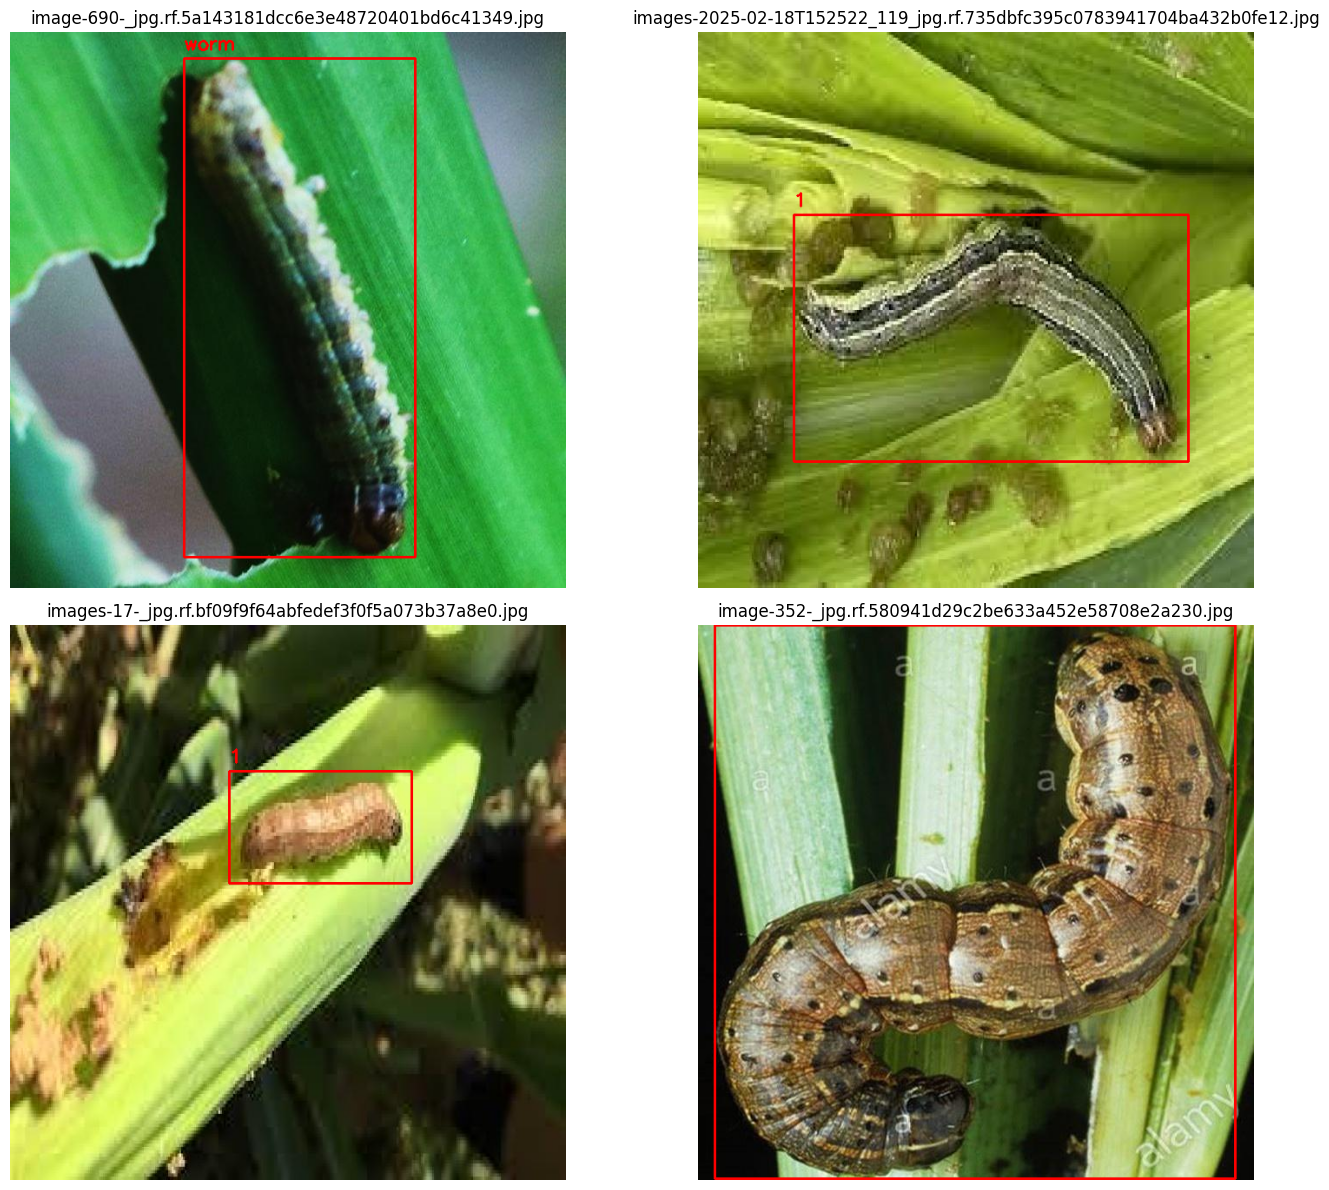

In [8]:
#@title Visualize Random Dataset Samples (from original XMLs)

import os
import glob
import random
import xml.etree.ElementTree as ET
import cv2 # Used for drawing rectangles
import matplotlib.pyplot as plt # Used for displaying images in Colab

print("--- Visualizing Random Samples from Cloned Dataset ---")

# --- 1. Define Paths ---
# This path points to the folder containing your train/val/test subfolders
DATASET_BASE_PATH = "/content/FAW_YOLO_dataset"
TRAIN_FOLDER_PATH = os.path.join(DATASET_BASE_PATH, "train")
NUM_IMAGES_TO_SHOW = 4 # How many random images to display

# --- 2. Find XML files ---
# We'll sample from the training data
xml_files = glob.glob(os.path.join(TRAIN_FOLDER_PATH, "*.xml"))

if not xml_files:
    print(f"❌ ERROR: No XML files found in {TRAIN_FOLDER_PATH}")
    print("   Please make sure you have run the data cloning step (Cell 2.1) correctly.")
else:
    print(f"Found {len(xml_files)} XML files. Picking {NUM_IMAGES_TO_SHOW} random samples...")

    # --- 3. Setup Plot ---
    fig_cols = 2
    fig_rows = (NUM_IMAGES_TO_SHOW + fig_cols - 1) // fig_cols
    plt.figure(figsize=(15, 6 * fig_rows))

    # --- 4. Loop, Draw, and Display ---
    random_samples = random.sample(xml_files, min(len(xml_files), NUM_IMAGES_TO_SHOW))

    for i, xml_file in enumerate(random_samples):
        try:
            # --- A. Parse XML ---
            tree = ET.parse(xml_file)
            root = tree.getroot()

            # Find corresponding image file
            filename_node = root.find('filename')
            if filename_node is not None:
                image_name = filename_node.text
            else: # Fallback: assume image name matches XML name
                base_name = os.path.splitext(os.path.basename(xml_file))[0]
                image_name = base_name + '.jpg' # Default guess

            image_path = os.path.join(TRAIN_FOLDER_PATH, image_name)

            # Try finding common extensions if the first guess fails
            if not os.path.exists(image_path):
                base_image_path = os.path.join(TRAIN_FOLDER_PATH, os.path.splitext(image_name)[0])
                for ext in ['.jpeg', '.png', '.JPG', '.PNG', '.JPEG']:
                    if os.path.exists(base_image_path + ext):
                        image_path = base_image_path + ext
                        break

            if not os.path.exists(image_path):
                print(f"  Warning: Skipping {xml_file}, cannot find corresponding image: {image_name}")
                continue

            # --- B. Load Image ---
            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert for Matplotlib

            # --- C. Draw Bounding Boxes ---
            for member in root.findall('object'):
                class_name = member.find('name').text
                bndbox = member.find('bndbox')
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)

                # Draw rectangle (red box)
                cv2.rectangle(image_rgb, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
                # Draw text
                cv2.putText(image_rgb, class_name, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

            # --- D. Display Image ---
            plt.subplot(fig_rows, fig_cols, i + 1)
            plt.imshow(image_rgb)
            plt.title(os.path.basename(image_path))
            plt.axis('off')

        except Exception as e:
            print(f"  Error processing {xml_file}: {e}")

    plt.tight_layout()
    plt.show()

In [9]:
#@title Find All Unique Labels in XML Files

import os
import glob
import xml.etree.ElementTree as ET

# --- Verify this path is correct ---
# This points to the folder *containing* train/validation
DATASET_BASE_PATH = "/content/FAW_YOLO_dataset"
# ------------------------------------

train_xml_path = os.path.join(DATASET_BASE_PATH, 'train')
val_xml_path = os.path.join(DATASET_BASE_PATH, 'validation')

unique_labels = set() # Use a set to store unique names

print("--- Searching for labels in XML files ---")

# Combine paths to search
paths_to_search = [train_xml_path, val_xml_path]

for folder_path in paths_to_search:
    print(f"Searching {folder_path}...")
    # Find all XML files in the current folder
    xml_files = glob.glob(os.path.join(folder_path, '*.xml'))
    if not xml_files:
        print(f"  No XML files found in {folder_path}")
        continue

    for xml_file in xml_files:
        try:
            # Parse the XML file
            tree = ET.parse(xml_file)
            root = tree.getroot()
            # Find all 'object' tags
            for member in root.findall('object'):
                # Extract the text from the 'name' tag
                class_name = member.find('name').text
                if class_name: # Ensure the name tag exists and is not empty
                    unique_labels.add(class_name) # Add the name to the set
        except ET.ParseError:
            print(f"  Warning: Could not parse {os.path.basename(xml_file)} - XML Parse Error.")
        except Exception as e:
            # Catch other potential errors during parsing (e.g., missing tags)
            print(f"  Warning: Error processing {os.path.basename(xml_file)}: {e}")

print("\n--- Unique Labels Found ---")
if unique_labels:
    # Convert set to list and sort alphabetically
    sorted_labels = sorted(list(unique_labels))
    print(f"Found {len(sorted_labels)} unique labels:")
    # Print the sorted list
    for label in sorted_labels:
        print(f"- {label}")
else:
    print("No labels found. Please check XML files and paths.")

# Optionally store the list if needed later (though we usually use it immediately)
# %store sorted_labels

--- Searching for labels in XML files ---
Searching /content/FAW_YOLO_dataset/train...
Searching /content/FAW_YOLO_dataset/validation...

--- Unique Labels Found ---
Found 23 unique labels:
- -
- 1
- 2
- Armyworm
- Armyworm_damage
- Cabbage-worm
- Corn-earworm
- Cutworm
- Fall-Armyworm
- Fall-armyworm
- Maize-fall-armyworm
- Plaga
- Worms
- armWorm
- army worm adult
- armyWorm
- armyworm
- fall-armyworm
- fallarmyworm
- pest
- pest-armyworm
- unkown
- worm


In [10]:
#@title 1: Count All Label Instances in the Dataset

import os
import glob
import xml.etree.ElementTree as ET
from tqdm.notebook import tqdm # For progress bar
from collections import Counter

print("--- Counting all label instances in the dataset ---")

# --- 1. Define Paths ---
# This path must be correct
DATASET_BASE_PATH = "/content/FAW_YOLO_dataset"
# ---------------------------------------------

folders_to_search = [
    os.path.join(DATASET_BASE_PATH, "train"),
    os.path.join(DATASET_BASE_PATH, "validation")
]

# This will store our findings
label_counter = Counter()
total_xmls_parsed = 0

print(f"Searching for all labels in: {DATASET_BASE_PATH}")

for folder in folders_to_search:
    print(f"Parsing: {folder}...")
    xml_files = glob.glob(os.path.join(folder, "*.xml"))
    if not xml_files:
        print(f"  No XML files found in {folder}")
        continue

    total_xmls_parsed += len(xml_files)

    for xml_file in tqdm(xml_files, desc=f"Parsing {os.path.basename(folder)} XMLs"):
        try:
            tree = ET.parse(xml_file)
            root = tree.getroot()

            # Find all 'object' tags
            for member in root.findall('object'):
                class_name = member.find('name').text
                if class_name:
                    # Add one to the count for this class name
                    label_counter[class_name] += 1

        except Exception as e:
            print(f"  Warning: Could not parse {os.path.basename(xml_file)}. Error: {e}")

print("\n--- Count Complete ---")
print(f"Parsed {total_xmls_parsed} total XML files.")
print("\n--- Total Instances (Bounding Boxes) Found Per Class ---")

# Sort the labels alphabetically for a clean report
sorted_labels = sorted(label_counter.items())

if not sorted_labels:
    print("No labels were found.")
else:
    for label, count in sorted_labels:
        print(f"- {label}: {count} instances")

--- Counting all label instances in the dataset ---
Searching for all labels in: /content/FAW_YOLO_dataset
Parsing: /content/FAW_YOLO_dataset/train...


Parsing train XMLs:   0%|          | 0/11232 [00:00<?, ?it/s]

Parsing: /content/FAW_YOLO_dataset/validation...


Parsing validation XMLs:   0%|          | 0/1889 [00:00<?, ?it/s]


--- Count Complete ---
Parsed 13121 total XML files.

--- Total Instances (Bounding Boxes) Found Per Class ---
- -: 1 instances
- 1: 3006 instances
- 2: 549 instances
- Armyworm: 1744 instances
- Armyworm_damage: 1388 instances
- Cabbage-worm: 116 instances
- Corn-earworm: 129 instances
- Cutworm: 181 instances
- Fall-Armyworm: 122 instances
- Fall-armyworm: 139 instances
- Maize-fall-armyworm: 113 instances
- Plaga: 3234 instances
- Worms: 252 instances
- armWorm: 684 instances
- army worm adult: 174 instances
- armyWorm: 1 instances
- armyworm: 1119 instances
- fall-armyworm: 637 instances
- fallarmyworm: 1231 instances
- pest: 1000 instances
- pest-armyworm: 89 instances
- unkown: 58 instances
- worm: 2311 instances


--- Searching for images containing label: 'Worms' ---
Searching in: /content/FAW_YOLO_dataset/train...
Searching in: /content/FAW_YOLO_dataset/validation...

Found 184 images containing 'Worms'. Showing 4 random samples...


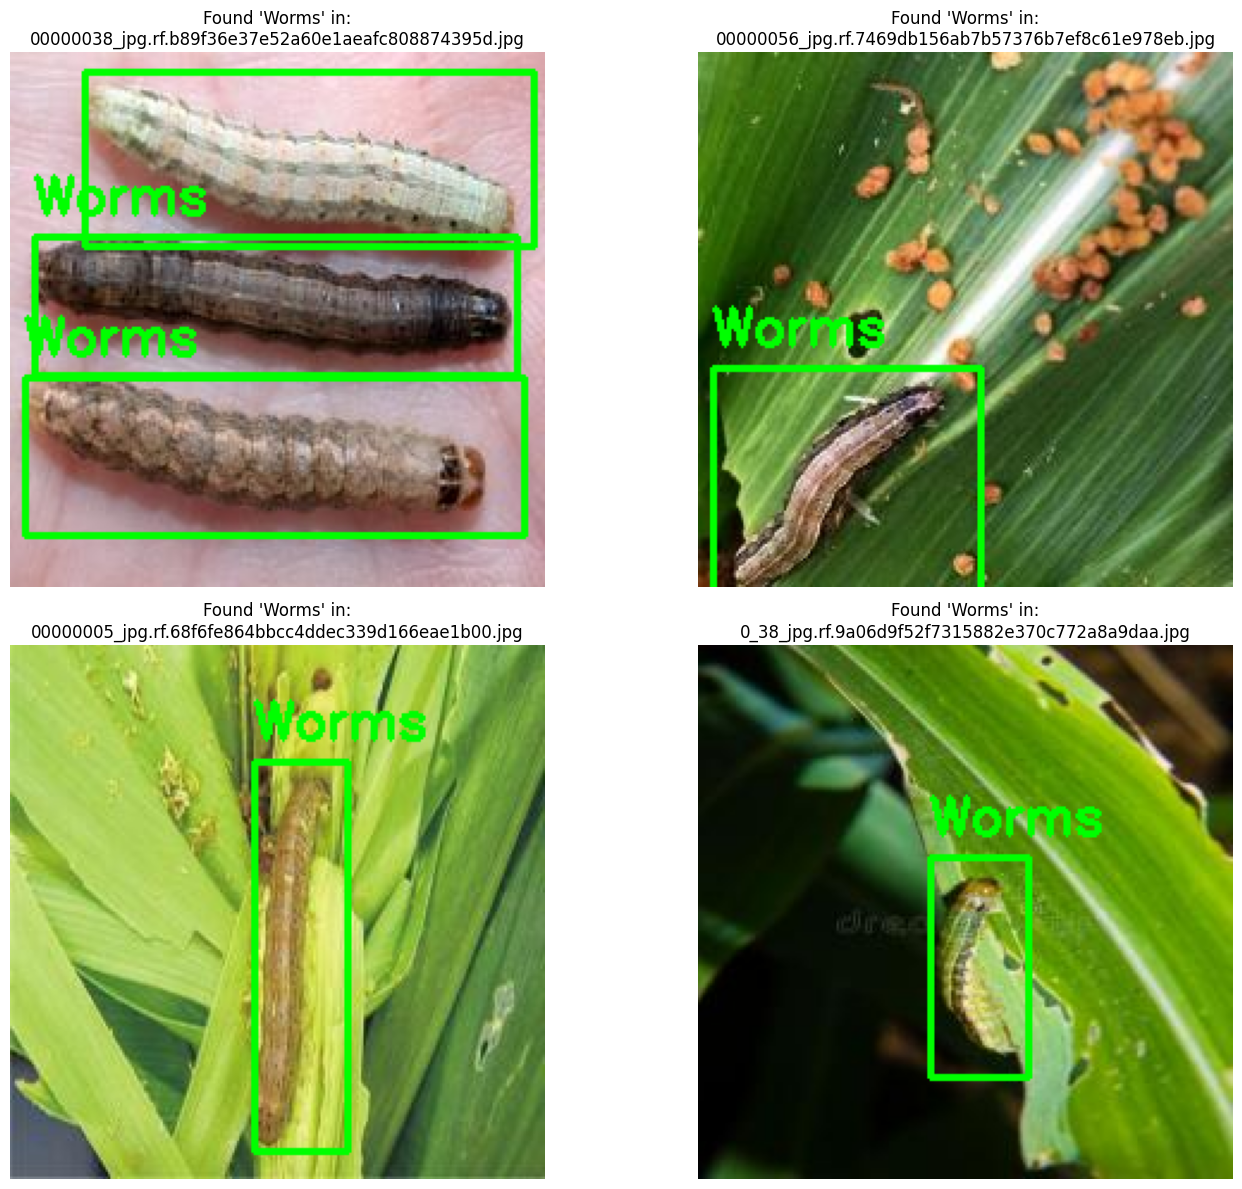

In [11]:
#@title 2: Visualize Images for a Specific Label

import os
import glob
import random
import xml.etree.ElementTree as ET
import cv2 # Used for drawing rectangles
import matplotlib.pyplot as plt # Used for displaying images in Colab

# ==========================================================
# !!! CHANGE THIS LABEL TO VISUALIZE DIFFERENT CLASSES !!!
# (e.g., 'Cabbage-worm', 'Cutworm', '1', '-')
TARGET_LABEL = "Worms"
# ==========================================================

NUM_IMAGES_TO_SHOW = 4 # How many random images to display
DATASET_BASE_PATH = "/content/FAW_YOLO_dataset"
# ---------------------------------------------

print(f"--- Searching for images containing label: '{TARGET_LABEL}' ---")

# --- 1. Find all XMLs that contain the target label ---
folders_to_search = [
    os.path.join(DATASET_BASE_PATH, "train"),
    os.path.join(DATASET_BASE_PATH, "validation")
]
xmls_with_target = [] # Store XML file paths that contain the label

for folder in folders_to_search:
    print(f"Searching in: {folder}...")
    xml_files = glob.glob(os.path.join(folder, "*.xml"))
    if not xml_files: continue

    for xml_file in xml_files:
        try:
            tree = ET.parse(xml_file)
            root = tree.getroot()
            for member in root.findall('object'):
                if member.find('name').text == TARGET_LABEL:
                    xmls_with_target.append(xml_file)
                    break # Stop searching this file, move to the next
        except Exception:
            continue # Skip files that can't be parsed

if not xmls_with_target:
    print(f"\n❌ No images found in the dataset with the label '{TARGET_LABEL}'.")
else:
    print(f"\nFound {len(xmls_with_target)} images containing '{TARGET_LABEL}'. Showing {NUM_IMAGES_TO_SHOW} random samples...")

    # --- 2. Setup Plot ---
    fig_cols = 2
    fig_rows = (NUM_IMAGES_TO_SHOW + fig_cols - 1) // fig_cols
    plt.figure(figsize=(15, 6 * fig_rows))

    # --- 3. Loop, Draw, and Display ---
    random_samples = random.sample(xmls_with_target, min(len(xmls_with_target), NUM_IMAGES_TO_SHOW))

    for i, xml_file in enumerate(random_samples):
        try:
            tree = ET.parse(xml_file)
            root = tree.getroot()

            # Find corresponding image
            image_folder = os.path.dirname(xml_file)
            filename_node = root.find('filename')
            image_name = filename_node.text if filename_node is not None else (os.path.splitext(os.path.basename(xml_file))[0] + '.jpg')
            image_path = os.path.join(image_folder, image_name)

            if not os.path.exists(image_path):
                base_image_path = os.path.join(image_folder, os.path.splitext(image_name)[0])
                for ext in ['.jpeg', '.png', '.JPG', '.PNG', '.JPEG']:
                    if os.path.exists(base_image_path + ext): image_path = base_image_path + ext; break
            if not os.path.exists(image_path): continue

            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Draw *all* boxes on that image
            for member in root.findall('object'):
                class_name = member.find('name').text
                bndbox = member.find('bndbox')
                xmin, ymin, xmax, ymax = (int(bndbox.find(tag).text) for tag in ['xmin', 'ymin', 'xmax', 'ymax'])

                # Highlight the target label in GREEN, others in RED
                color = (0, 255, 0) if class_name == TARGET_LABEL else (255, 0, 0)

                cv2.rectangle(image_rgb, (xmin, ymin), (xmax, ymax), color, 2)
                cv2.putText(image_rgb, class_name, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

            # Display Image
            plt.subplot(fig_rows, fig_cols, i + 1)
            plt.imshow(image_rgb)
            plt.title(f"Found '{TARGET_LABEL}' in:\n{os.path.basename(image_path)}")
            plt.axis('off')

        except Exception as e:
            print(f"  Error processing {xml_file}: {e}")

    plt.tight_layout()
    plt.show()

In [12]:
#@title 2.2 (Updated): Convert XML to YOLO (1-Class Model, 5 Exclusions)

import os
import glob
import xml.etree.ElementTree as ET
from tqdm.notebook import tqdm # For progress bar
import shutil # Import shutil for reliable copying

print("--- Starting XML to YOLO Conversion (1-Class Model, 5 Exclusions) ---")

# --- 1. Define Class Mapping (0-indexed) ---
# All 18 non-junk labels map to 'FallArmyworm' (ID 0).
# The 5 labels you listed are EXCLUDED.
class_mapping = {
    # --- FAW & Other Labels (Map to 0) ---
    '1': 0,
    '2': 0,
    'Armyworm': 0,
    'Armyworm_damage': 0,
    'Fall-Armyworm': 0,
    'Fall-armyworm': 0,
    'Maize-fall-armyworm': 0,
    'Plaga': 0,
    'Worms': 0,
    'armWorm': 0,
    'army worm adult': 0,
    'armyWorm': 0,
    'armyworm': 0,
    'fall-armyworm': 0,
    'fallarmyworm': 0,
    'pest': 0,
    'pest-armyworm': 0,
    'worm': 0

    # --- SKIPPED LABELS ---
    # 'Cabbage-worm': 0, (Excluded)
    # 'Corn-earworm': 0, (Excluded)
    # 'Cutworm': 0, (Excluded)
    # '-': 0, (Excluded)
    # 'unkown': 0 (Excluded)
}
# Define the final names list for the YAML file
final_class_names = ['FallArmyworm'] # Our single target class
print(f"Using 1-Class mapping (ID 0='{final_class_names[0]}')")
print("Skipping labels: Cabbage-worm, Corn-earworm, Cutworm, -, unkown")

# --- 2. Define Paths ---
# CRITICAL: This must be the path to your ORIGINAL dataset with XMLs
SOURCE_DATA_PATH = "/content/FAW_YOLO_dataset"
# Create a new, final dataset folder
YOLO_DATASET_PATH = "/content/faw_yolo_dataset_final_1class"

# --- 3. Create Output Directories ---
if os.path.exists(YOLO_DATASET_PATH):
    print(f"Removing existing output directory: {YOLO_DATASET_PATH}")
    shutil.rmtree(YOLO_DATASET_PATH)
os.makedirs(os.path.join(YOLO_DATASET_PATH, "images", "train"), exist_ok=True)
os.makedirs(os.path.join(YOLO_DATASET_PATH, "images", "val"), exist_ok=True)
os.makedirs(os.path.join(YOLO_DATASET_PATH, "labels", "train"), exist_ok=True)
os.makedirs(os.path.join(YOLO_DATASET_PATH, "labels", "val"), exist_ok=True)
print(f"Created fresh output structure at: {YOLO_DATASET_PATH}")

# --- 4. Conversion Function (Same as before) ---
def convert_xml_to_yolo(xml_file_path, output_label_path, class_map):
    """Converts a single XML file to YOLO format."""
    try:
        tree = ET.parse(xml_file_path)
        root = tree.getroot()
        size_node = root.find('size')
        if size_node is None: return False, False # Indicate skipped, no objects found
        img_width = int(size_node.find('width').text); img_height = int(size_node.find('height').text)
        if img_width <= 0 or img_height <= 0: return False, False
        yolo_annotations = []; objects_found_in_xml = False; valid_objects_written = False
        for member in root.findall('object'):
            objects_found_in_xml = True; class_name = member.find('name').text
            # This 'if' statement will now skip the 5 junk labels
            if class_name not in class_map:
                continue
            class_id = class_map[class_name]; bndbox = member.find('bndbox')
            try: xmin, ymin, xmax, ymax = int(bndbox.find('xmin').text), int(bndbox.find('ymin').text), int(bndbox.find('xmax').text), int(bndbox.find('ymax').text)
            except AttributeError: continue
            xmin, ymin, xmax, ymax = max(0, xmin), max(0, ymin), min(img_width - 1, xmax), min(img_height - 1, ymax)
            box_width = xmax - xmin; box_height = ymax - ymin
            if box_width <= 0 or box_height <= 0: continue
            x_center = (xmin + box_width / 2) / img_width; y_center = (ymin + box_height / 2) / img_height
            width_norm = box_width / img_width; height_norm = box_height / img_height
            x_center, y_center, width_norm, height_norm = max(0.0, min(1.0, x_center)), max(0.0, min(1.0, y_center)), max(0.0, min(1.0, width_norm)), max(0.0, min(1.0, height_norm))
            yolo_annotations.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width_norm:.6f} {height_norm:.6f}"); valid_objects_written = True
        if objects_found_in_xml:
            # We create a label file (it might be empty if all objects were junk)
            with open(output_label_path, 'w') as f: f.write("\n".join(yolo_annotations))
            return True, valid_objects_written
        else: return False, False
    except ET.ParseError: return False, False
    except Exception as e: print(f" Error processing {os.path.basename(xml_file_path)}: {e}"); return False, False

# --- 5. Process Train and Validation Sets ---
processed_count = {'train': 0, 'val': 0}; skipped_count = {'train': 0, 'val': 0}
images_copied = {'train': 0, 'val': 0}; labels_created = {'train': 0, 'val': 0}
labels_with_valid_objects = {'train': 0, 'val': 0}

for split in ['train', 'validation']:
    print(f"\n--- Processing '{split}' set ---")
    output_split_name = 'val' if split == 'validation' else 'train'
    source_folder = os.path.join(SOURCE_DATA_PATH, split)
    image_dest_folder = os.path.join(YOLO_DATASET_PATH, "images", output_split_name)
    label_dest_folder = os.path.join(YOLO_DATASET_PATH, "labels", output_split_name)
    xml_files = glob.glob(os.path.join(source_folder, '*.xml'))
    if not xml_files: print(f"  No XML files found in {source_folder}"); continue

    for xml_file in tqdm(xml_files, desc=f"Converting {split} XMLs"):
        base_filename = os.path.splitext(os.path.basename(xml_file))[0]
        output_txt_path = os.path.join(label_dest_folder, base_filename + '.txt')
        processed, found_valid_objects = convert_xml_to_yolo(xml_file, output_txt_path, class_mapping)
        if processed:
            processed_count[output_split_name] += 1; labels_created[output_split_name] += 1
            if found_valid_objects: labels_with_valid_objects[output_split_name] += 1
            image_copied_flag = False
            for ext in ['.jpg', '.jpeg', '.png']:
                img_file = os.path.join(source_folder, base_filename + ext)
                if os.path.exists(img_file):
                    _, source_ext = os.path.splitext(img_file); img_dest_path = os.path.join(image_dest_folder, base_filename + source_ext)
                    try: shutil.copy2(img_file, img_dest_path); image_copied_flag = True; images_copied[output_split_name] += 1; break
                    except Exception as copy_e: break
            if not image_copied_flag:
                 if os.path.exists(output_txt_path): os.remove(output_txt_path)
                 labels_created[output_split_name] -= 1
                 if found_valid_objects: labels_with_valid_objects[output_split_name] -=1
                 processed_count[output_split_name] -= 1; skipped_count[output_split_name] += 1
        else: skipped_count[output_split_name] += 1

print("\n--- Conversion Summary ---")
print(f"Train set: {processed_count['train']} XMLs processed, {skipped_count['train']} skipped.")
print(f"  - Images copied: {images_copied['train']}")
print(f"  - Label files created: {labels_created['train']}")
print(f"  - Label files with valid objects (FAW): {labels_with_valid_objects['train']}")
print(f"Validation set: {processed_count['val']} XMLs processed, {skipped_count['val']} skipped.")
print(f"  - Images copied: {images_copied['val']}")
print(f"  - Label files created: {labels_created['val']}")
print(f"  - Label files with valid objects (FAW): {labels_with_valid_objects['val']}")
print(f"YOLO formatted data saved to: {YOLO_DATASET_PATH}")

# Verify output structure and counts
print("\n--- Verifying Output File Counts ---")
!echo "Train images:" && ls -1 {YOLO_DATASET_PATH}/images/train | wc -l
!echo "Train labels:" && ls -1 {YOLO_DATASET_PATH}/labels/train | wc -l
!echo "Val images:" && ls -1 {YOLO_DATASET_PATH}/images/val | wc -l
!echo "Val labels:" && ls -1 {YOLO_DATASET_PATH}/labels/val | wc -l

--- Starting XML to YOLO Conversion (1-Class Model, 5 Exclusions) ---
Using 1-Class mapping (ID 0='FallArmyworm')
Skipping labels: Cabbage-worm, Corn-earworm, Cutworm, -, unkown
Created fresh output structure at: /content/faw_yolo_dataset_final_1class

--- Processing 'train' set ---


Converting train XMLs:   0%|          | 0/11232 [00:00<?, ?it/s]


--- Processing 'validation' set ---


Converting validation XMLs:   0%|          | 0/1889 [00:00<?, ?it/s]


--- Conversion Summary ---
Train set: 11222 XMLs processed, 10 skipped.
  - Images copied: 11222
  - Label files created: 11222
  - Label files with valid objects (FAW): 10869
Validation set: 1889 XMLs processed, 0 skipped.
  - Images copied: 1889
  - Label files created: 1889
  - Label files with valid objects (FAW): 1847
YOLO formatted data saved to: /content/faw_yolo_dataset_final_1class

--- Verifying Output File Counts ---
Train images:
11222
Train labels:
11222
Val images:
1889
Val labels:
1889


In [13]:
#@title 2.3 (Final): Create dataset.yaml (1-Class FAW-Only Model)

import yaml
import os

print("--- Creating faw_dataset_final_1class.yaml ---") # Updated filename

# --- 1. Define Paths ---
# Path to the NEW 1-Class YOLO dataset
YOLO_DATASET_PATH = "/content/faw_yolo_dataset_final_1class" # Updated path

# --- 2. Define Final Class Names (Order corresponds to ID 0) ---
final_class_names = ['FallArmyworm'] # Our single target class

# --- 3. Create the dictionary for YAML content ---
dataset_config = {
    'path': YOLO_DATASET_PATH,
    'train': 'images/train',
    'val': 'images/val',
    'names': {i: name for i, name in enumerate(final_class_names)}
}

# --- 4. Define the output file path ---
YAML_OUTPUT_PATH = "/content/faw_dataset_final_1class.yaml" # New YAML filename

# --- 5. Write the dictionary to the YAML file ---
try:
    with open(YAML_OUTPUT_PATH, 'w') as f:
        yaml.dump(dataset_config, f, sort_keys=False, default_flow_style=None)
    print(f"✅ Successfully created {YAML_OUTPUT_PATH}")

    # --- 6. Verify Content ---
    print("\n--- Content of faw_dataset_final_1class.yaml: ---")
    !cat {YAML_OUTPUT_PATH}

except Exception as e:
    print(f"❌ Error creating YAML file: {e}")

--- Creating faw_dataset_final_1class.yaml ---
✅ Successfully created /content/faw_dataset_final_1class.yaml

--- Content of faw_dataset_final_1class.yaml: ---
path: /content/faw_yolo_dataset_final_1class
train: images/train
val: images/val
names: {0: FallArmyworm}


In [14]:
#@title Check if Albumentations is Installed
try:
    import albumentations
    print(f"✅ Albumentations is installed (version {albumentations.__version__}).")
    print("   Ultralytics will automatically use it for extra augmentations during training.")
except ModuleNotFoundError:
    print("❌ Albumentations is NOT installed.")
    print("   Ultralytics will still use its standard built-in augmentations.")
    print("   You can install it with: !pip install -q albumentations")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

✅ Albumentations is installed (version 2.0.8).
   Ultralytics will automatically use it for extra augmentations during training.


In [ ]:
#@title 3.1 & 3.2 (Final Training): Load YOLOv11s & Train 50 Epochs

from ultralytics import YOLO
import os

print("--- Initializing YOLOv11s model ---")
# Load the pre-trained YOLOv11 'small' model
model = YOLO("yolo11s.pt")
print("✅ Model initialized.")

# --- Define Training Parameters ---
# ** Pointing to our new 1-class YAML file **
DATASET_YAML_PATH = "/content/faw_dataset_final_1class.yaml"

NUM_EPOCHS = 100 # <-- Changed to 50 epochs for a baseline test
IMAGE_SIZE = 640
BATCH_SIZE = 16
GDRIVE_PROJECT_PATH = "/content/drive/MyDrive/FAW_Capstone_YOLO(11ss)" # Your specified path
# ** New run name for this 50-epoch test **
RUN_NAME = 'yolov11s_faw_1class_50epoch_run'
OUTPUT_DIR = os.path.join(GDRIVE_PROJECT_PATH, "runs")

# --- Create output directory ---
os.makedirs(os.path.join(OUTPUT_DIR, RUN_NAME), exist_ok=True)

print("\n--- Starting Final Training (1-Class Model, 50 Epochs) ---")
print(f"Model: yolo11s.pt")
print(f"Dataset config: {DATASET_YAML_PATH}")
print(f"Epochs: {NUM_EPOCHS}")
print(f"Image size: {IMAGE_SIZE}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Output directory: {OUTPUT_DIR}/{RUN_NAME}")

# Start the training process
try:
    results = model.train(
        data=DATASET_YAML_PATH,
        epochs=NUM_EPOCHS,
        imgsz=IMAGE_SIZE,
        batch=BATCH_SIZE,
        project=OUTPUT_DIR,
        name=RUN_NAME,
        device=0,           # Use GPU 0
        exist_ok=True       # Allow overwriting if you run this test cell again
    )
    print("\n--- Training Completed ---")

except Exception as e:
    print(f"\n--- ERROR during training ---")
    print(e)
    !nvidia-smi

      2/100      4.87G      1.425      1.257      1.572         13        640: 100% ━━━━━━━━━━━━ 702/702 3.1it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 60/60 3.6it/s 16.8s
                   all       1889       2348      0.795      0.692      0.761      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      3/100      4.89G      1.523      1.424      1.656         24        640: 100% ━━━━━━━━━━━━ 702/702 3.2it/s 3:42
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 60/60 3.5it/s 17.1s
                   all       1889       2348      0.683      0.616       0.66      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      4/100       4.9G      1.591      1.545      1.714         12        640: 100% ━━━━━━━━━━━━ 702/702 3.2it/s 3:41
                 Class     Images  Instances      Box(